In [2]:
# This is a strategy for importing data into lists so that we can use it!
import numpy as np
import scipy.stats as stats
import pandas as pd
import math
# read the whole data file in:
data = pd.read_csv("FA22_exp4.csv", header = 6)


# read all elements and wavelengths in the file:
elements = data.Element.unique()
print(F'These are all the elements and wavelengths that appear in the data file {elements}')

standards =[]
conc = []

#slice by element - all standards data
for x in elements:
    temp = data[data.values == x]
    temps = temp[temp.values == 'STD']
    temps_Int = temps['Intensity'].tolist()
    temps_conc = temps['Concentration'].tolist()
    temps_conc = [float(j) for j in temps_conc]
    standards.append (temps_Int)
    conc.append(temps_conc)
    
#standards = np.array(standards, dtype = float)
print(F'These are all the standard intensities for each element {standards}')
#print (F'These are the concentrations for each element standard, as recorded in the file {conc}')
                            
sample = []
#slice by element - all sample data
for x in elements:
    temp = data[data.values == x]
    temps = temp[temp.values == 'Sample']
    temps_Int = temps['Intensity'].tolist()
    
    sample.append (temps_Int)

#print (sample)
    

These are all the elements and wavelengths that appear in the data file ['Cu 327.395' 'Fe 238.204' 'Pb 220.353']
These are all the standard intensities for each element [[44.8, 891.83, 5488.18, 12110.01, 24089.39, 46040.71, 69225.0, 91742.69, 113330.75, 283741.7], [30.2, 917.35, 6882.93, 17735.15, 34064.23, 66636.9, 99873.22, 132671.34, 165916.37, 413844.44], [15.67, 117.43, 684.97, 1441.86, 2723.92, 5485.97, 8028.08, 10632.38, 13402.44, 34284.95]]


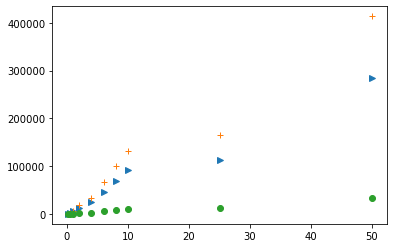

In [10]:
import matplotlib.pyplot as plt
import itertools
marker = itertools.cycle(('>', '+', 'o', '*')) 
x = np.array(conc)
y = np.array(standards)

for i in range(len(elements)):
    plt.plot(x[i], y[i], marker = next(marker), linestyle='')
plt.show()

#plt.errorbar(x.T, y.T, yerr = None, xerr = None, fmt = 'r.')
#plt.xlabel("concentration (ug/L)")
#plt.ylabel("average intensity")

In [19]:
# best fit lines
slope = []
intercept = []
Rsqd = []

#place to store sample data
unknown = []
#make sure sample is a numpy array
sample = np.array(sample)
#print(sample)

for i in range(len(elements)):
    m, b, R2, p, s_m = stats.linregress(x[i], y[i])
    slope.append(m)
    intercept.append(b)
    Rsqd.append(R2)
    temp = (sample[i] - b)/m
    unknown.append(temp)
    

count = 0
for i in elements:
    print(F'The calibration curve for {i} is y = {slope[count]}x +{intercept[count]} and has a R^2 value of {Rsqd[count]}')
    print(F'the unknowns for {i} have concentrations of {unknown[count]} mg/mL')
    count = count + 1



The calibration curve for Cu 327.395 is y = 5430.310604171041x +6783.394959536716 and has a R^2 value of 0.9817111665055329
the unknowns for Cu 327.395 have concentrations of [99.89186523 -0.15646526 -1.07103725  1.87040775  1.51436182 -0.30597052] mg/mL
The calibration curve for Fe 238.204 is y = 7936.790353427116x +9251.027832466934 and has a R^2 value of 0.9823885021883836
the unknowns for Fe 238.204 have concentrations of [ 1.03380120e+02 -9.37126722e-02 -1.14466647e+00  1.88739673e+00
  1.36646953e+00 -2.36537410e-01] mg/mL
The calibration curve for Pb 220.353 is y = 655.4226110274474x +694.9619664474103 and has a R^2 value of 0.9829420084253891
the unknowns for Pb 220.353 have concentrations of [1.01078063e+02 1.69337430e+01 6.51915769e-02 1.93892579e+01
 1.66551136e+01 1.50003034e+01] mg/mL
